In [3]:
import pandas as pd

data_raw = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
print(data_raw.columns)


Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code'],
      dtype='object')


In [4]:
## Data Review - Initial

import pandas as pd
data = pd.read_csv(
    "/home/surendran/rag_local/data/walmart Retail Data.csv",
    parse_dates=['Order Date'],   # convert to datetime
    index_col='Order Date'        # use it as time index
)

print(data.head())
print(data.info())



                  City  Customer Age      Customer Name Customer Segment  \
Order Date                                                                 
2012-01-01  McKeesport           NaN     Jessica Myrick   Small Business   
2012-01-01       Bowie           NaN     Matt Collister      Home Office   
2012-01-02        Napa           NaN  Alan Schoenberger        Corporate   
2012-01-02  Montebello           NaN  Elizabeth Moffitt         Consumer   
2012-01-02        Napa           NaN  Alan Schoenberger        Corporate   

            Discount  Number of Records  Order ID Order Priority  \
Order Date                                                         
2012-01-01      0.10                  1     28774           High   
2012-01-01      0.08                  1     13729  Not Specified   
2012-01-02      0.00                  1     37537            Low   
2012-01-02      0.08                  1     44069       Critical   
2012-01-02      0.07                  1     37537          

In [5]:
## Data Review - Daily

# Group by Order Date and sum up Sales
daily_sales = data.groupby('Order Date')['Sales'].sum()

# Preview the result
print("\n📊 Daily aggregated sales:\n", daily_sales.head())

# Optional: check number of unique dates
print("\nTotal unique dates:", len(daily_sales))



📊 Daily aggregated sales:
 Order Date
2012-01-01     1052.8400
2012-01-02    11101.8700
2012-01-03    31997.8555
2012-01-04     1254.2500
2012-01-05    39734.4040
Name: Sales, dtype: float64

Total unique dates: 1418


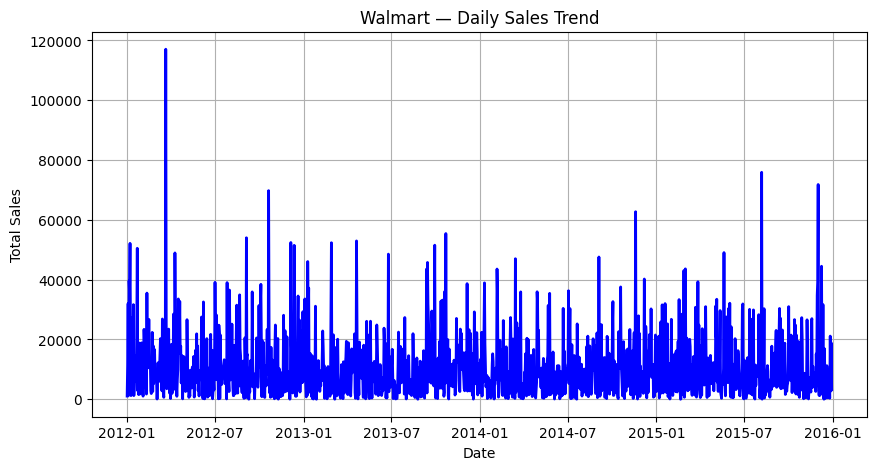

In [4]:
## Trend analysis - Daily

import matplotlib.pyplot as plt

# --- Step 5: Plot daily sales trend ---
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, color='blue', linewidth=2)
plt.title("Walmart — Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()



📊 Weekly sales totals:
 Order Date
2012-01-01      1052.8400
2012-01-08    193971.4365
2012-01-15    100202.6600
2012-01-22    120648.7240
2012-01-29     63851.8890
Freq: W-SUN, Name: Sales, dtype: float64


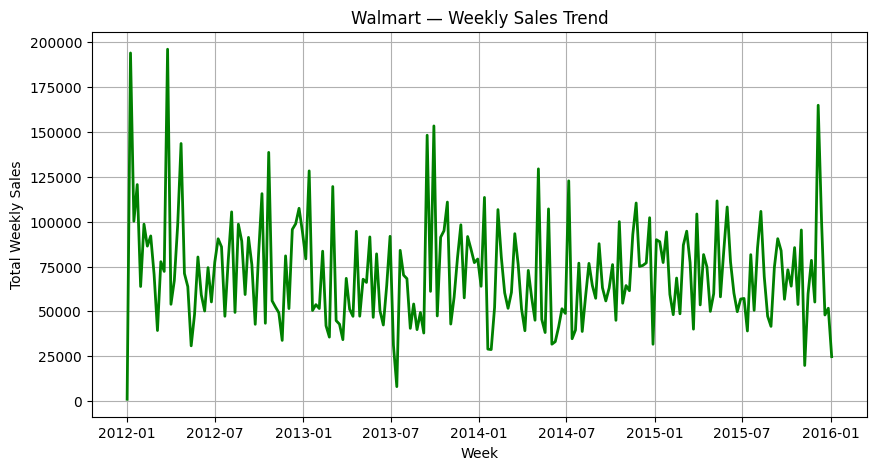

In [ ]:
## Data Review & Trend Analysis - weekly

# Preview the result
print("\n📊 Weekly sales totals:\n", weekly_sales.head())

# Plot the weekly trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(weekly_sales.index, weekly_sales.values, color='green', linewidth=2)
plt.title("Walmart — Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.show()



📊 Monthly sales totals:
 Order Date
2012-01-31    516302.9595
2012-02-29    332480.6365
2012-03-31    411628.7290
2012-04-30    393276.4820
2012-05-31    230145.5380
Freq: ME, Name: Sales, dtype: float64


/tmp/ipykernel_10340/822942008.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum()


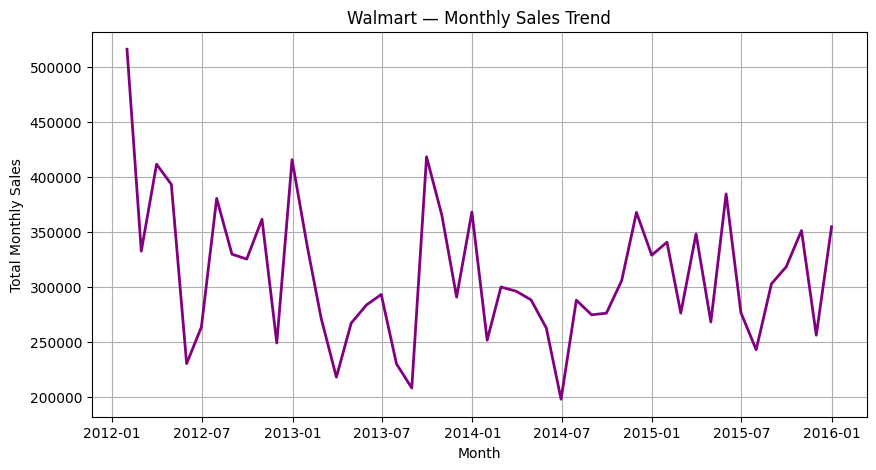

In [6]:
## Data Review & Trend Analysis - monthly

monthly_sales = daily_sales.resample('M').sum()

# Preview the result
print("\n📊 Monthly sales totals:\n", monthly_sales.head())

# Plot the monthly trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, color='purple', linewidth=2)
plt.title("Walmart — Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales")
plt.grid(True)
plt.show()


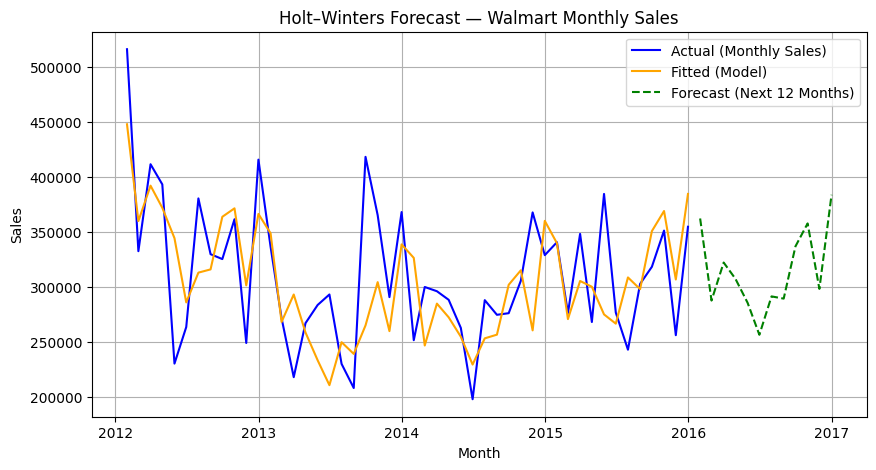

In [6]:
## Holt Winter Model performance - Monthly data

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit the model with optimized parameters
model = ExponentialSmoothing(
    monthly_sales,
    trend='add',            # additive trend
    seasonal='mul',         # multiplicative seasonality (often fits sales data better)
    seasonal_periods=12     # 12 months = one full year
).fit(optimized=True)

# Forecast next 12 months
forecast = model.forecast(12)

# --- Plot results ---
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Actual (Monthly Sales)', color='blue')
plt.plot(model.fittedvalues, label='Fitted (Model)', color='orange')
plt.plot(forecast.index, forecast, label='Forecast (Next 12 Months)', color='green', linestyle='--')
plt.title("Holt–Winters Forecast — Walmart Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


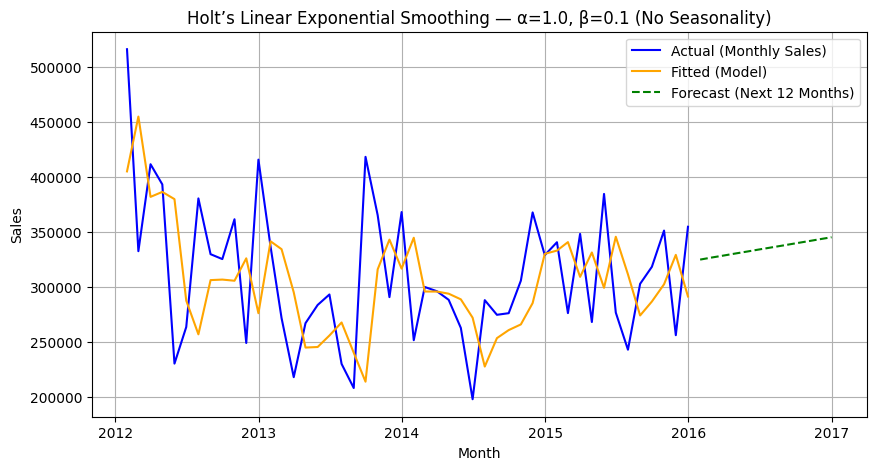

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# --- Fit Holt’s Linear model (no seasonality) ---
model = ExponentialSmoothing(
    monthly_sales,
    trend='add',          # additive trend component
    seasonal=None         # no seasonality
).fit(
    smoothing_level=0.5,  # alpha
    smoothing_trend=0.1,  # beta
    optimized=False       # use the fixed values above
)

# --- Forecast next 12 months ---
forecast = model.forecast(12)

# --- Plot actuals, fitted, and forecast ---
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Actual (Monthly Sales)', color='blue')
plt.plot(model.fittedvalues, label='Fitted (Model)', color='orange')
plt.plot(forecast.index, forecast, label='Forecast (Next 12 Months)', color='green', linestyle='--')
plt.title("Holt’s Linear Exponential Smoothing — α=1.0, β=0.1 (No Seasonality)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


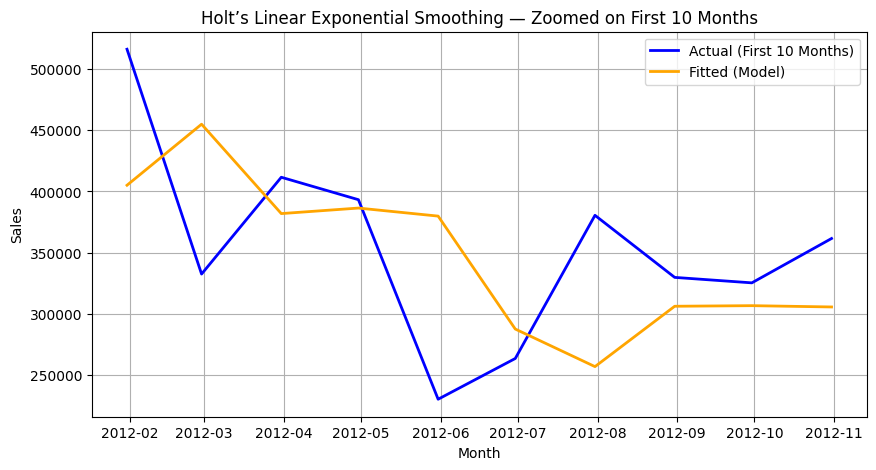

In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Fit Holt’s Linear model (no seasonality) ---
model = ExponentialSmoothing(
    monthly_sales,
    trend='add',
    seasonal=None
).fit(
    smoothing_level=0.5,
    smoothing_trend=0.1,
    optimized=False
)

# --- Limit to first 10 months only ---
zoomed_actual = monthly_sales.iloc[:10]
zoomed_fitted = model.fittedvalues.loc[zoomed_actual.index]

# --- Plot zoomed section ---
plt.figure(figsize=(10,5))
plt.plot(zoomed_actual, label='Actual (First 10 Months)', color='blue', linewidth=2)
plt.plot(zoomed_fitted, label='Fitted (Model)', color='orange', linewidth=2)
plt.title("Holt’s Linear Exponential Smoothing — Zoomed on First 10 Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
